In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("sentiment.csv")

In [3]:
df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [6]:
from textblob import TextBlob

def get_sentiment(text):
    blob=TextBlob(text)
    return blob.sentiment.polarity

In [7]:
df['sentiment_score']=df['content'].apply(get_sentiment)

In [8]:
def get_sentiment_type(score):
    if score>0:
        return "positive"
    elif score<0:
        return "negative"
    else :
        return "neutral"

In [9]:
df['sentiment_type']=df['sentiment_score'].apply(get_sentiment_type)

In [10]:
df

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares,sentiment_score,sentiment_type
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472,0.000000,neutral
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380,0.900000,positive
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387,0.000000,neutral
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458,0.285714,positive
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655,0.000000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
52537,ddlovato,Life couldn't be better right now. 😊,NaN,06/01/2015 23:10,5.526030e+17,en,NaN,NaN,32799,23796,0.392857,positive
52538,ddlovato,First Monday back in action. I'd say 21.6 mile...,NaN,06/01/2015 02:17,5.522880e+17,en,NaN,NaN,21709,12511,0.162500,positive
52539,ddlovato,"Crime shows, buddy, snuggles = the perfect Sun...",NaN,05/01/2015 03:42,5.519470e+17,en,NaN,NaN,25269,15583,1.000000,positive
52540,ddlovato,❄️ http://t.co/sHCFdPpGPa,NaN,05/01/2015 00:06,5.518920e+17,und,NaN,NaN,15985,10456,0.000000,neutral


([<matplotlib.patches.Wedge at 0x2061df16890>,
 [Text(0.12077508748558528, 1.0933496139126082, 'positive'),
  Text(-0.4121404692904002, -1.019872655566904, 'neutral'),
  Text(1.0589578797952268, -0.2976713100377634, 'negative')],
 [Text(0.06587732044668287, 0.5963725166796044, '46.5%'),
  Text(-0.22480389234021828, -0.5562941757637657, '44.8%'),
  Text(0.5776133889792145, -0.1623661691115073, '8.7%')])

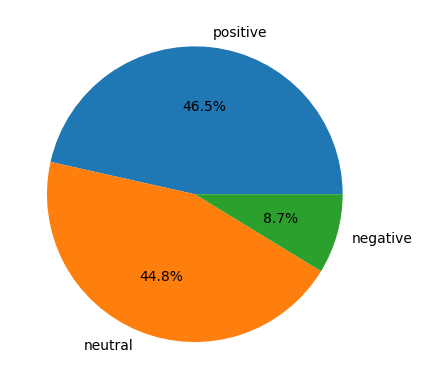

In [14]:
import matplotlib.pyplot as plt 
plt.pie(df['sentiment_type'].value_counts(),labels=df['sentiment_type'].value_counts().index, autopct="%1.1f%%")

In [25]:
df_negative_author=df[df['sentiment_type']=='negative']['author']

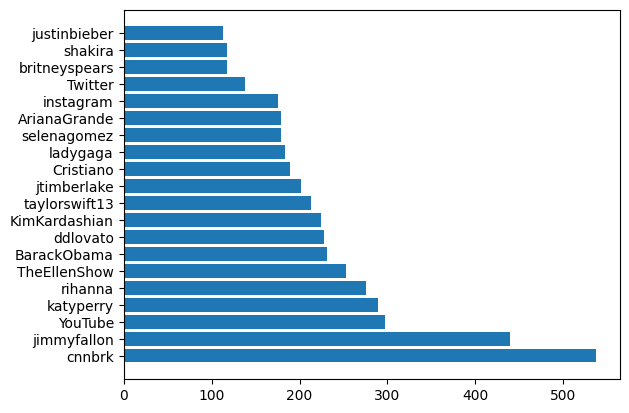

In [30]:
plt.barh(df_negative_author.value_counts().index,df_negative_author.value_counts().values)
plt.show()